#1.패키지 정의 및 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie/')
df= pd.read_excel("/content/drvie/MyDrive/빅콘데이터/빅콘제공전체데이터.xlsx")
TOTAL = pd.read_excel("/content/drvie/MyDrive/빅콘데이터/TOTAL데이터.xlsx")
KG = pd.read_excel("/content/drvie/MyDrive/빅콘데이터/금액중량데이터.xlsx")

Mounted at /content/drvie/


# 2. 데이터 전처리

In [ ]:
df = df.drop(['P_TYPE','CTRY_2','CATEGORY_1','CATEGORY_2'],axis=1)
df

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,중국,판매용,흰다리새우,"냉동,살,자숙",7.202863
1,2015-12-28,중국,판매용,흰다리새우,"냉동,살",6.972132
2,2015-12-28,페루,판매용,흰다리새우,냉동,6.100000
3,2015-12-28,태국,판매용,흰다리새우,"냉동,살,자숙",13.377047
4,2015-12-28,태국,판매용,흰다리새우,"냉동,살",15.050566
...,...,...,...,...,...,...
7794,2020-12-28,베트남,판매용,흰다리새우,"냉동,살",7.410000
7795,2020-12-28,노르웨이,판매용,연어,"냉장,필렛(F)",15.290000
7796,2020-12-28,중국,판매용,오징어,냉동,3.150000
7797,2020-12-28,노르웨이,자사제품제조용,연어,"냉장,필렛(F)",14.260000


In [ ]:
TOTAL.columns =['REG_DATE','CTRY_1','CTRY_2','P_PURPOSE','P_IMPORT_TYPE','TOTAL_P','TOTAL_KG','P_PRICE']
TOTAL

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE
0,2015-12-28,노르웨이,노르웨이,자사제품제조용,연어(냉장),46217,5502,8.400036
1,2015-12-28,노르웨이,노르웨이,자사제품제조용,"연어(냉장,필렛(F))",701298,52235,13.425826
2,2015-12-28,노르웨이,노르웨이,판매용,연어(냉장),2266692,256289,8.844281
3,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,포장횟감,필렛(F))",25963,1356,19.146755
4,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,필렛(F))",35421,2738,12.936815
...,...,...,...,...,...,...,...,...
11720,2020-12-28,페루,페루,판매용,"오징어(냉동,지느러미)",414707,311902,1.329607
11721,2020-12-28,페루,페루,판매용,흰다리새우(냉동),774250,126000,6.144841
11722,2020-12-28,호주,아르헨티나,자사제품제조용,연어(냉장),28764,3196,9.000000
11723,2020-12-28,호주,호주,자사제품제조용,연어(냉장),57253,6361,9.000629


In [ ]:
KG.columns=['REG_DATE','CTRY_1','CTRY_2','P_PURPOSE','P_IMPORT_TYPE','P_PRICE','P_KG','월요일']
KG = KG.drop(['월요일'],axis=1)

In [ ]:
KG['P_IMPORT_TYPE']=KG['P_IMPORT_TYPE'].astype('str')

In [ ]:
data=[TOTAL,KG]

for i in data :
  i['P_IMPORT_TYPE']=i['P_IMPORT_TYPE'].astype('str')
  i['P_NAME']=i['P_IMPORT_TYPE'].str.slice(start=0, stop=2)

In [ ]:
KG

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,P_PRICE,P_KG,P_NAME
0,2015-12-28,캐나다,캐나다,판매용,연어(냉장),1967,271,연어
1,2015-12-28,칠레,칠레,판매용,"오징어(냉동,동체)",48000,48000,오징
2,2015-12-28,칠레,칠레,판매용,"오징어(냉동,지느러미)",40080,48000,오징
3,2015-12-28,중국,중국,판매용,"오징어(냉동,동체)",29328,33475,오징
4,2015-12-28,중국,중국,판매용,"오징어(냉동,동체,자숙)",42625,15500,오징
...,...,...,...,...,...,...,...,...
27005,2020-12-31,페루,페루,판매용,"오징어(냉동,다리)",192150,89800,오징
27006,2020-12-31,페루,페루,판매용,"오징어(냉동,지느러미)",41850,44050,오징
27007,2020-12-31,태국,태국,판매용,"흰다리새우(냉동,살)",124877,10460,흰다
27008,2020-12-31,대만,대만,판매용,오징어(냉동),840179,240051,오징


In [ ]:
TOTAL

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE,P_NAME
0,2015-12-28,노르웨이,노르웨이,자사제품제조용,연어(냉장),46217,5502,8.400036,연어
1,2015-12-28,노르웨이,노르웨이,자사제품제조용,"연어(냉장,필렛(F))",701298,52235,13.425826,연어
2,2015-12-28,노르웨이,노르웨이,판매용,연어(냉장),2266692,256289,8.844281,연어
3,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,포장횟감,필렛(F))",25963,1356,19.146755,연어
4,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,필렛(F))",35421,2738,12.936815,연어
...,...,...,...,...,...,...,...,...,...
11720,2020-12-28,페루,페루,판매용,"오징어(냉동,지느러미)",414707,311902,1.329607,오징
11721,2020-12-28,페루,페루,판매용,흰다리새우(냉동),774250,126000,6.144841,흰다
11722,2020-12-28,호주,아르헨티나,자사제품제조용,연어(냉장),28764,3196,9.000000,연어
11723,2020-12-28,호주,호주,자사제품제조용,연어(냉장),57253,6361,9.000629,연어


In [ ]:
squid_TOTAL = TOTAL[TOTAL['P_NAME'] == "오징"]
squid_TOTAL['P_NAME']=squid_TOTAL['P_IMPORT_TYPE'].str.slice(start=0, stop=3)
salmon_TOTAL = TOTAL[TOTAL['P_NAME'] == "연어"]
salmon_TOTAL['P_NAME']=salmon_TOTAL['P_IMPORT_TYPE'].str.slice(start=0, stop=2)
shrimp_TOTAL = TOTAL[TOTAL['P_NAME'] == "흰다"]
shrimp_TOTAL['P_NAME']=shrimp_TOTAL['P_IMPORT_TYPE'].str.slice(start=0, stop=5)

In [ ]:
salmon_TOTAL['P_IMPORT_TYPE']=salmon_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[연어()]', repl= r' ', regex=True)
salmon_TOTAL['P_IMPORT_TYPE']=salmon_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[F]', repl= r'(F) ', regex=True)
salmon_TOTAL['P_IMPORT_TYPE']=salmon_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[ ]', repl= r'', regex=True)
salmon_TOTAL

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE,P_NAME
0,2015-12-28,노르웨이,노르웨이,자사제품제조용,냉장,46217,5502,8.400036,연어
1,2015-12-28,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",701298,52235,13.425826,연어
2,2015-12-28,노르웨이,노르웨이,판매용,냉장,2266692,256289,8.844281,연어
3,2015-12-28,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963,1356,19.146755,연어
4,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",35421,2738,12.936815,연어
...,...,...,...,...,...,...,...,...,...
11686,2020-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",483736,31629,15.294066,연어
11687,2020-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",67217,4597,14.621927,연어
11722,2020-12-28,호주,아르헨티나,자사제품제조용,냉장,28764,3196,9.000000,연어
11723,2020-12-28,호주,호주,자사제품제조용,냉장,57253,6361,9.000629,연어


In [ ]:
shrimp_TOTAL['P_IMPORT_TYPE']=shrimp_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[흰다리새우()]', repl= r' ', regex=True)
shrimp_TOTAL['P_IMPORT_TYPE']=shrimp_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[ ]', repl= r'', regex=True)
shrimp_TOTAL.P_IMPORT_TYPE.unique()

array(['냉동', '냉동,자숙', '냉동,살', '냉동,살,자숙', '냉동,살,자숙,포장횟감', '냉동,살,포장횟감',
       '냉장', '냉동,자숙,횟감'], dtype=object)

In [ ]:
squid_TOTAL['P_IMPORT_TYPE']=squid_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[오징어()]', repl= r'', regex=True)
squid_TOTAL['P_IMPORT_TYPE']=squid_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r' ', repl= r'', regex=True)
squid_TOTAL

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE,P_NAME
6,2015-12-28,대만,대만,판매용,"냉동,동체",728670,366166,1.989999,오징어
7,2015-12-28,대한민국,중국,판매용,냉동,13500,7500,1.800000,오징어
19,2015-12-28,중국,중국,판매용,"냉동,동체",102768,129475,0.793729,오징어
20,2015-12-28,중국,중국,판매용,"냉동,동체,자숙",42625,15500,2.750000,오징어
23,2015-12-28,칠레,칠레,자사제품제조용,"냉동,다리",4440,3700,1.200000,오징어
...,...,...,...,...,...,...,...,...,...
11712,2020-12-28,칠레,칠레,판매용,"냉동,동체",47970,24600,1.950000,오징어
11717,2020-12-28,페루,페루,판매용,"냉동,다리",291050,134800,2.159125,오징어
11718,2020-12-28,페루,페루,판매용,"냉동,동체",104392,74713,1.397240,오징어
11719,2020-12-28,페루,페루,판매용,"냉동,동체,자숙",1222340,419600,2.913108,오징어


In [ ]:
TOTAL = pd.concat([salmon_TOTAL,shrimp_TOTAL,squid_TOTAL])
TOTAL = TOTAL.drop(['CTRY_2'],axis=1)
TOTAL

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE,P_NAME
0,2015-12-28,노르웨이,자사제품제조용,냉장,46217,5502,8.400036,연어
1,2015-12-28,노르웨이,자사제품제조용,"냉장,필렛(F)",701298,52235,13.425826,연어
2,2015-12-28,노르웨이,판매용,냉장,2266692,256289,8.844281,연어
3,2015-12-28,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963,1356,19.146755,연어
4,2015-12-28,노르웨이,판매용,"냉장,필렛(F)",35421,2738,12.936815,연어
...,...,...,...,...,...,...,...,...
11712,2020-12-28,칠레,판매용,"냉동,동체",47970,24600,1.950000,오징어
11717,2020-12-28,페루,판매용,"냉동,다리",291050,134800,2.159125,오징어
11718,2020-12-28,페루,판매용,"냉동,동체",104392,74713,1.397240,오징어
11719,2020-12-28,페루,판매용,"냉동,동체,자숙",1222340,419600,2.913108,오징어


In [ ]:
full_data = pd.merge(df,TOTAL,how='inner',on = ['REG_DATE','CTRY_1','P_PURPOSE','P_IMPORT_TYPE','P_NAME'])

In [ ]:
full_data1 = full_data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
col=['CTRY_1','P_PURPOSE','P_IMPORT_TYPE','P_NAME']
for i in col:
  le = LabelEncoder()
  le= le.fit(full_data[i])
  full_data1[i] = le.transform(full_data[i])

full_data1

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_P,TOTAL_KG,P_PRICE_y
0,2015-12-28,20,4,2,10,7.202863,271692,37720,7.202863
1,2015-12-28,20,4,2,9,6.972132,198148,28420,6.972132
2,2015-12-28,26,4,2,1,6.100000,110532,18120,6.100000
3,2015-12-28,24,4,2,10,13.377047,192790,14412,13.377047
4,2015-12-28,24,4,2,9,15.050566,227399,15109,15.050566
...,...,...,...,...,...,...,...,...,...
7902,2020-12-28,9,4,2,9,7.410000,974170,131451,7.410898
7903,2020-12-28,1,4,0,20,15.290000,483736,31629,15.294066
7904,2020-12-28,20,4,1,1,3.150000,2971076,944025,3.147243
7905,2020-12-28,1,3,0,20,14.260000,1493221,104701,14.261764


In [ ]:
data = [full_data,full_data1]

for i in data : 
    print(i.CTRY_1.unique())
    print(i.P_PURPOSE.unique())
    print(i.P_IMPORT_TYPE.unique())
    print(i.P_NAME.unique())

['중국' '페루' '태국' '대만' '노르웨이' '사우디아라비아' '에콰도르' '말레이시아' '베트남' '칠레' '캐나다' '인도'
 '인도네시아' '대한민국' '아르헨티나' '러시아' '영국' '아일랜드' '미국' '뉴질랜드' '파나마' '필리핀' '바누아투'
 '아이슬란드' '호주' '콜롬비아' '나미비아' '우루과이' '스페인']
['판매용' '자사제품제조용' '외화획득용 원료' '반송품(기타)' '외화획득용 제품']
['냉동,살,자숙' '냉동,살' '냉동' '냉동,동체' '냉장,필렛(F)' '냉동,살,자숙,포장횟감' '냉동,다리'
 '냉동,살,포장횟감' '냉장,포장횟감,필렛(F)' '냉장' '냉동,동체,자숙' '냉동,지느러미' '냉장,필렛(F),횟감'
 '냉동,자숙' '냉동,다리,자숙' '냉동,지느러미,자숙' '냉동,난포선' '냉동,곤이' '냉동,동체,포장횟감' '냉동,필렛(F)'
 '건조' '냉동,포장횟감,필렛(F)']
['흰다리새우' '오징어' '연어']
[20 26 24  3  1 10 15  6  9 21 22 18 19  4 12  5 16 14  7  2 25 27  8 13
 28 23  0 17 11]
[4 3 1 0 2]
[10  9  1  6 20 11  4 12 19 18  7 14 21 13  5 15  3  2  8 17  0 16]
[2 1 0]


In [ ]:
full_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 7906
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       7907 non-null   datetime64[ns]
 1   CTRY_1         7907 non-null   int64         
 2   P_PURPOSE      7907 non-null   int64         
 3   P_NAME         7907 non-null   int64         
 4   P_IMPORT_TYPE  7907 non-null   int64         
 5   P_PRICE_x      7907 non-null   float64       
 6   TOTAL_P        7907 non-null   int64         
 7   TOTAL_KG       7907 non-null   int64         
 8   P_PRICE_y      7907 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 617.7 KB


# 3.KSUM ,PER 생성

In [ ]:
KSUM1=full_data1.groupby(['REG_DATE','P_NAME'])['TOTAL_KG'].agg(**{'KSUM':'sum'}).reset_index()
KSUM1

,REG_DATE,P_NAME,KSUM
0,2015-12-28,0,328859
1,2015-12-28,1,1365441
2,2015-12-28,2,758535
3,2016-01-04,0,376523
4,2016-01-04,1,829188
...,...,...,...
773,2020-12-21,1,2625629
774,2020-12-21,2,556226
775,2020-12-28,0,730115
776,2020-12-28,1,2104596


In [ ]:
full_data1=pd.merge(full_data1,KSUM1,on=['REG_DATE','P_NAME'])
full_data1

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_P,TOTAL_KG,P_PRICE_y,KSUM
0,2015-12-28,20,4,2,10,7.202863,271692,37720,7.202863,758535
1,2015-12-28,20,4,2,9,6.972132,198148,28420,6.972132,758535
2,2015-12-28,26,4,2,1,6.100000,110532,18120,6.100000,758535
3,2015-12-28,24,4,2,10,13.377047,192790,14412,13.377047,758535
4,2015-12-28,24,4,2,9,15.050566,227399,15109,15.050566,758535
...,...,...,...,...,...,...,...,...,...,...
7902,2020-12-28,1,3,0,18,8.750000,63135,7217,8.748095,730115
7903,2020-12-28,1,4,0,19,29.740000,30563,1027,29.759494,730115
7904,2020-12-28,1,4,0,20,15.290000,483736,31629,15.294066,730115
7905,2020-12-28,1,3,0,20,14.260000,1493221,104701,14.261764,730115


In [ ]:
full_data1['PER'] = full_data1['TOTAL_KG'] / full_data1['KSUM']
full_data1

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_P,TOTAL_KG,P_PRICE_y,KSUM,PER
0,2015-12-28,20,4,2,10,7.202863,271692,37720,7.202863,758535,0.049727
1,2015-12-28,20,4,2,9,6.972132,198148,28420,6.972132,758535,0.037467
2,2015-12-28,26,4,2,1,6.100000,110532,18120,6.100000,758535,0.023888
3,2015-12-28,24,4,2,10,13.377047,192790,14412,13.377047,758535,0.019000
4,2015-12-28,24,4,2,9,15.050566,227399,15109,15.050566,758535,0.019919
...,...,...,...,...,...,...,...,...,...,...,...
7902,2020-12-28,1,3,0,18,8.750000,63135,7217,8.748095,730115,0.009885
7903,2020-12-28,1,4,0,19,29.740000,30563,1027,29.759494,730115,0.001407
7904,2020-12-28,1,4,0,20,15.290000,483736,31629,15.294066,730115,0.043321
7905,2020-12-28,1,3,0,20,14.260000,1493221,104701,14.261764,730115,0.143403


In [ ]:
full_data1.to_csv('full_data.csv')

In [ ]:
salmon_label=full_data1[full_data1['P_NAME'] == 0]
squid_label=full_data1[full_data1['P_NAME'] == 1]
shrimp_label=full_data1[full_data1['P_NAME'] == 2]

In [ ]:
salmon=full_data[full_data['P_NAME'] == "연어"]
shrimp=full_data[full_data['P_NAME'] == "흰다리새우"]
squid=full_data[full_data['P_NAME'] == "오징어"]

In [ ]:
salmon['P_IMPORT_TYPE'].unique()

array(['냉장,필렛(F)', '냉장,포장횟감,필렛(F)', '냉장,필렛(F),횟감', '냉장', '냉동', '냉동,곤이',
       '냉동,필렛(F)', '냉동,포장횟감,필렛(F)'], dtype=object)

In [ ]:
salmon_label['P_IMPORT_TYPE'].unique()

array([20, 19, 21, 18,  1,  2, 17, 16])

In [ ]:
squid_label['P_IMPORT_TYPE'].unique()

array([ 6,  4,  7, 14,  1,  5, 15,  3,  8, 13,  0])

In [ ]:
shrimp_label['P_IMPORT_TYPE'].unique()

array([10,  9,  1, 11, 12, 18, 13])

In [ ]:
d_list = salmon_label['P_IMPORT_TYPE'].unique().tolist()
for i in d_list:
    globals()['salmon_label{}'.format(i)] = salmon_label.loc[salmon_label['P_IMPORT_TYPE']==i]

In [ ]:
d_list = squid_label['P_IMPORT_TYPE'].unique().tolist()
for i in d_list:
    globals()['squid_label{}'.format(i)] = squid_label.loc[squid_label['P_IMPORT_TYPE']==i]


In [ ]:
squid_label13

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_P,TOTAL_KG,P_PRICE_y,KSUM,PER
3445,2018-03-26,20,4,1,13,3.373474,92204,27332,3.373482,3205593,0.008526
3585,2018-04-23,20,4,1,13,2.250000,108000,48000,2.250000,2747545,0.017470
4616,2018-12-17,20,4,1,13,2.200000,105600,48000,2.200000,2710752,0.017707
6803,2020-05-04,20,4,1,13,2.258750,72280,32000,2.258750,1768301,0.018096


In [ ]:
d_list = shrimp_label['P_IMPORT_TYPE'].unique().tolist()
for i in d_list:
    globals()['shrimp_label{}'.format(i)] = shrimp_label.loc[shrimp_label['P_IMPORT_TYPE']==i]

In [ ]:
X_train = full_data1[full_data1['REG_DATE'] < '2019-12-31']
X_train = X_train.drop(['P_PRICE_y'],axis=1)

In [ ]:
X_test = full_data1[full_data1['REG_DATE'] >'2020-01-05']
X_test = X_test.drop(['P_PRICE_y'],axis=1)

In [ ]:
salmon_train = X_train[X_train['P_NAME'] == 0 ]
shrimp_train = X_train[X_train['P_NAME'] == 2 ]
squid_train = X_train[X_train['P_NAME'] == 1 ]

In [ ]:
salmon_test = X_test[X_test['P_NAME'] == 0 ]
shrimp_test = X_test[X_test['P_NAME'] == 2 ]
squid_test = X_test[X_test['P_NAME'] == 1 ]

In [ ]:
y=salmon_test['P_PRICE_x']
salmon_test = salmon_test.drop(['P_PRICE_x'],axis=1)

<function matplotlib.pyplot.show>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


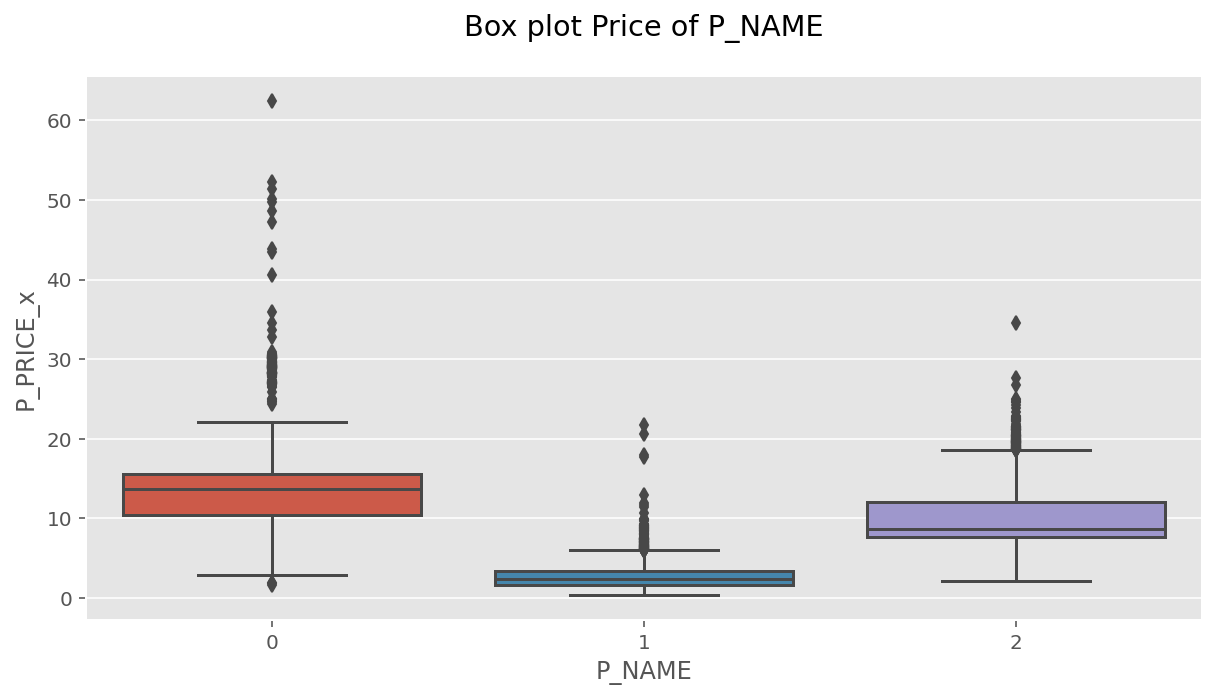

In [ ]:
#boxplot 
plt.figure(figsize=(10,5))
plt.title('Box plot Price of P_NAME', pad= 20)
sns.boxplot(x='P_NAME',y='P_PRICE_x',data = X_train)
plt.show 

In [ ]:
def get_outlier(df=None,column=None,weight=1.5):
    
    
    column_x = df[column]
    # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    quantile_25 = np.percentile(column_x.values,25)
    quantile_75 = np.percentile(column_x.values,75)
    
    # IQR을 구하고 IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 Dataframe index 반환
    outlier_index = column_x[(column_x < lowest_val) | (column_x > highest_val)]
    return outlier_index

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 9.5 MB 45.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from pmdarima import auto_arima

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#4.Arima Modeling


In [ ]:
# 아리마 성공
test_index= X_test['REG_DATE'].unique()
forecast_p_price = pd.DataFrame(index=test_index)
forecast_p_price_by_names = pd.DataFrame(index=test_index)

colname=['CTRY_1','P_IMPORT_TYPE']

for p_name in range(0,3) :

    f_p_name_price = pd.DataFrame(index = test_index, columns=['CTRY_1','P_IMPORT_TYPE'])

    for c in colname :
        f_per =pd.DataFrame(index = test_index)
        
        f_price =pd.DataFrame(index = test_index)
        
        X_train1 = X_train[X_train['P_NAME'] == p_name]
        gt=X_train1.groupby(['REG_DATE',c]).agg(**{'PER_SUM':pd.NamedAgg(column='PER', aggfunc='sum'),'NPRICE':pd.NamedAgg(column='TOTAL_P', aggfunc='sum'),'NTOTAL_KG':pd.NamedAgg(column='TOTAL_KG', aggfunc='sum')}).reset_index()
        
        gt['P_PRICE'] = gt['NPRICE'] / gt['NTOTAL_KG']

        g_train = gt.drop(['NPRICE','NTOTAL_KG'],axis=1)
        for L in range(1,len(X_train1[c].unique()+1)) :
            gg_train = g_train[g_train[c] == L]
            gg_train.index=gg_train['REG_DATE']
            gg_train=gg_train.resample('1W').first()
            gg_train=gg_train.fillna(0)
            gg_train =gg_train.drop([c,'REG_DATE'],axis=1)
            
            for k in range(0,2):
              if gg_train.iloc[:,k].sum()==0:
                continue
              else:
                 data = gg_train.iloc[:,k]           
                 model = auto_arima(data)
                 model.fit(data)
                 forecast = model.predict(n_periods=len(test_index))
                 forecast = pd.DataFrame(forecast,index = test_index,columns=['Prediction'])
                 if k ==0 : 
                    f_per[L-1] = forecast['Prediction']
                 else :
                    f_price[L-1] = forecast['Prediction']



        f_priceXper = f_per * f_price
        f_p_name_price[c] = f_priceXper.sum(axis=1)



    forecast_p_price_by_names= pd.concat([forecast_p_price_by_names, f_p_name_price], axis=1)


    
    forecast_p_price[p_name] = f_p_name_price.sum(axis=1)

In [ ]:
table_for_rmse = forecast_p_price_by_names 
table_for_rmse

,CTRY_1,P_IMPORT_TYPE,CTRY_1,P_IMPORT_TYPE,CTRY_1,P_IMPORT_TYPE
2020-01-06,12.252260,0.011627,0.087939,3.109670,5.336694,2.110210
2020-01-13,11.391242,0.011627,0.091977,3.199686,5.604949,2.123414
2020-01-20,11.297886,0.011627,0.076114,3.253664,5.657341,2.160430
2020-01-27,11.217470,0.011627,0.065342,3.348120,5.672105,2.186582
2020-02-03,11.150064,0.011627,0.077343,3.408890,5.675827,2.201951
2020-02-10,11.093548,0.011627,0.087259,3.470252,5.676564,2.219310
2020-02-17,11.043985,0.011627,0.089085,3.517908,5.676596,2.234318
2020-02-24,11.002487,0.011627,0.090832,3.551112,5.676516,2.245741
2020-03-02,10.967827,0.011627,0.088193,3.581550,5.676450,2.255917
2020-03-09,10.937118,0.011627,0.082910,3.596579,5.676410,2.264768


In [ ]:
X_test['PXP'] = X_test['PER'] * X_test['P_PRICE_x']

In [ ]:
X_test.groupby(['REG_DATE','P_NAME'])['PXP'].sum()

REG_DATE    P_NAME
2020-01-06  0         13.437030
            1          3.398597
            2          7.268614
2020-01-13  0         13.158248
            1          3.471425
                        ...    
2020-12-21  1          2.485622
            2          8.265502
2020-12-28  0          9.786647
            1          2.603155
            2          8.202121
Name: PXP, Length: 156, dtype: float64

In [ ]:
gt=X_test.groupby(['REG_DATE','P_NAME']).agg(**{'PXP':pd.NamedAgg(column='PXP', aggfunc='sum')}).reset_index()
gt

,REG_DATE,P_NAME,PXP
0,2020-01-06,0,13.437030
1,2020-01-06,1,3.398597
2,2020-01-06,2,7.268614
3,2020-01-13,0,13.158248
4,2020-01-13,1,3.471425
...,...,...,...
151,2020-12-21,1,2.485622
152,2020-12-21,2,8.265502
153,2020-12-28,0,9.786647
154,2020-12-28,1,2.603155


In [ ]:
sal_real=gt[gt['P_NAME'] == 0]
squid_real=gt[gt['P_NAME'] == 1]
shrimp_real=gt[gt['P_NAME'] == 2]
sal_real.index=X_test["REG_DATE"].unique()
squid_real.index=X_test["REG_DATE"].unique()
shrimp_real.index=X_test["REG_DATE"].unique()
table_for_rmse['sal_real']= sal_real['PXP']
table_for_rmse['squ_real']= squid_real['PXP']
table_for_rmse['shr_real']= shrimp_real['PXP']
table_for_rmse.columns = ['sal_ctry','sal_type','squid_ctry','squid_type','shrimp_ctry','shrimp_type','sal_real','squ_real','shr_real']
table_for_rmse['sal_pred']= table_for_rmse['sal_ctry'] + table_for_rmse['sal_type']
table_for_rmse['squ_pred']= table_for_rmse['squid_ctry'] + table_for_rmse['squid_type']
table_for_rmse['shr_pred']= table_for_rmse['shrimp_ctry'] + table_for_rmse['shrimp_type']
table_for_rmse=table_for_rmse.drop(['sal_ctry','sal_type','squid_ctry','squid_type','shrimp_ctry','shrimp_type'],axis=1)
table_for_rmse 

,sal_real,squ_real,shr_real,sal_pred,squ_pred,shr_pred
2020-01-06,13.437030,3.398597,7.268614,12.263888,3.197609,7.446903
2020-01-13,13.158248,3.471425,7.381857,11.402869,3.291663,7.728363
2020-01-20,13.061623,3.724984,7.849876,11.309513,3.329779,7.817772
2020-01-27,12.352793,2.610541,8.513390,11.229097,3.413462,7.858687
2020-02-03,10.802055,3.207032,8.487420,11.161692,3.486233,7.877778
2020-02-10,9.734984,3.130401,8.726081,11.105175,3.557511,7.895873
2020-02-17,9.758725,2.993861,7.622812,11.055612,3.606993,7.910914
2020-02-24,10.454042,2.434559,8.172645,11.014115,3.641944,7.922257
2020-03-02,10.688235,3.233841,7.883229,10.979454,3.669743,7.932367
2020-03-09,10.052014,2.996505,9.948143,10.948745,3.679489,7.941178


In [ ]:
from sklearn.metrics import mean_squared_error
y=table_for_rmse['sal_real']
y_pred=table_for_rmse['sal_pred']
RMSE1 = mean_squared_error(y, y_pred)**0.5
y=table_for_rmse['squ_real']
y_pred=table_for_rmse['squ_pred']
RMSE2 = mean_squared_error(y, y_pred)**0.5
y=table_for_rmse['shr_real']
y_pred=table_for_rmse['shr_pred']
RMSE3 = mean_squared_error(y, y_pred)**0.5

In [ ]:
print("RMSE Of Salmon",RMSE1)
print("RMSE Of Squid",RMSE2)
print("RMSE Of Shrimp",RMSE3)

RMSE Of Salmon 1.526680486764001
RMSE Of Squid 1.1015856553394834
RMSE Of Shrimp 0.6384407460323311


# 5. 2021년도 예측

In [ ]:
REG= pd.read_excel("/content/drvie/MyDrive/REG.xlsx")

NameError: ignored

In [ ]:
# 2021년 예측
forecast_index= REG['REG_DATE']
forecast_p_price1 = pd.DataFrame(index=forecast_index)
forecast_p_price_by_names1 = pd.DataFrame(index=forecast_index)

colname=['CTRY_1','P_IMPORT_TYPE']

for p_name in range(0,3) :

    f_p_name_price = pd.DataFrame(index = forecast_index, columns=['CTRY_1','P_IMPORT_TYPE'])

    for c in colname :
        f_per =pd.DataFrame(index = forecast_index)
        
        f_price =pd.DataFrame(index = forecast_index)
        
        X_train1 = X_train[X_train['P_NAME'] == p_name]
        gt=X_train1.groupby(['REG_DATE',c]).agg(**{'PER_SUM':pd.NamedAgg(column='PER', aggfunc='sum'),
                                                   'NPRICE':pd.NamedAgg(column='TOTAL_P', aggfunc='sum'),
                                                   'NTOTAL_KG':pd.NamedAgg(column='TOTAL_KG', aggfunc='sum')}).reset_index()
        
        
        gt['P_PRICE'] = gt['NPRICE'] / gt['NTOTAL_KG']

        g_train = gt.drop(['NPRICE','NTOTAL_KG'],axis=1)
        for L in range(1,len(X_train1[c].unique()+1)) :
            gg_train = g_train[g_train[c] == L]
            gg_train.index=gg_train['REG_DATE']
            gg_train=gg_train.resample('1W').first()
            gg_train=gg_train.fillna(0)
            gg_train =gg_train.drop([c,'REG_DATE'],axis=1)
            
            for k in range(0,2):
              if gg_train.iloc[:,k].sum()==0:
                continue
              else:
                 data = gg_train.iloc[:,k]           
                 model = auto_arima(data)
                 model.fit(data)
                 forecast = model.predict(n_periods=len(forecast_index))
                 forecast = pd.DataFrame(forecast,index = forecast_index,columns=['Prediction'])
                 if k ==0 : 
                    f_per[L-1] = forecast['Prediction']
                 else :
                    f_price[L-1] = forecast['Prediction']


        f_priceXper = f_per * f_price
        f_p_name_price[c] = f_priceXper.sum(axis=1)

        
    forecast_p_price_by_names_predict= pd.concat([forecast_p_price_by_names1, f_p_name_price], axis=1)
    forecast_p_price1[p_name] = f_p_name_price.sum(axis=1)
    

In [ ]:
forecast_p_price1

,0,1,2
REG_DATE,,,
2021-01-04,12.263888,3.197609,7.446903
2021-01-11,11.402869,3.291663,7.728363
2021-01-18,11.309513,3.329779,7.817772
2021-01-25,11.229097,3.413462,7.858687
2021-02-01,11.161692,3.486233,7.877778
2021-02-08,11.105175,3.557511,7.895873
2021-02-15,11.055612,3.606993,7.910914
2021-02-22,11.014115,3.641944,7.922257
2021-03-01,10.979454,3.669743,7.932367


In [ ]:
forecast_p_price1.to_csv('forecast2021.csv')